# 아보카도 가격 
ML model, ANN

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('avocado.csv')
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
df = df.drop(['Unnamed: 0', 'Date'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


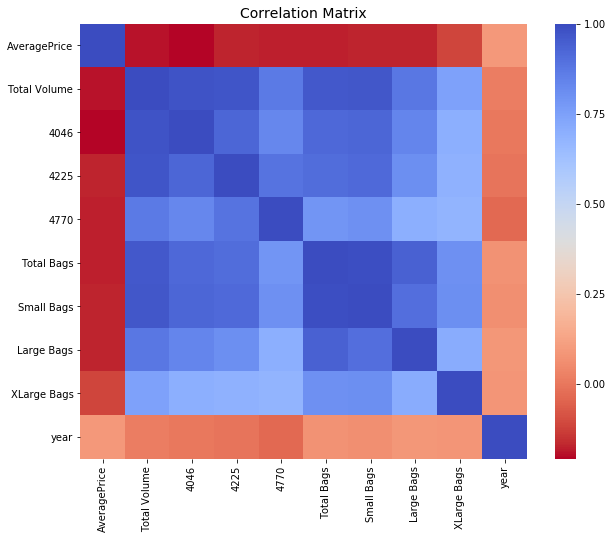

In [5]:
#
f, ax = plt.subplots(1, 1, figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

# 총량은 작은 가방과 서로 다른 총 가방들과 매우 밀접하게 연관

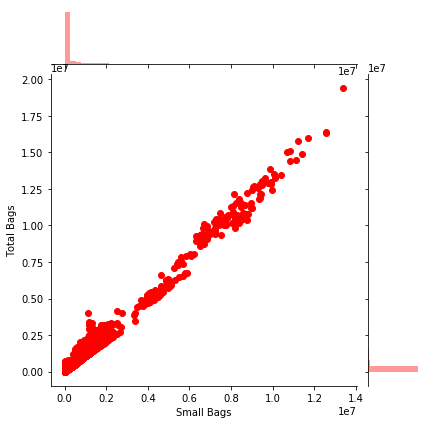

In [6]:
sns.jointplot(x='Small Bags',y='Total Bags',data=df, color='red')

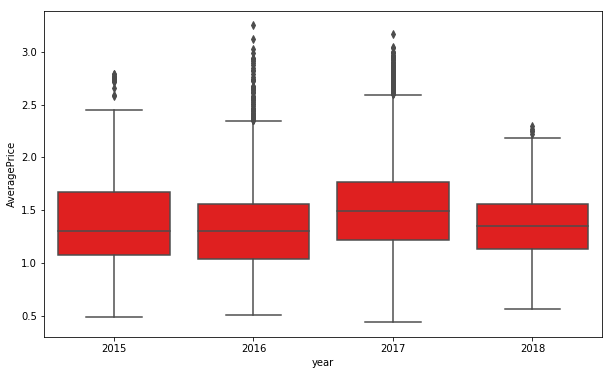

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='year',y='AveragePrice',data=df,color='red')

(0.44, 3.25)

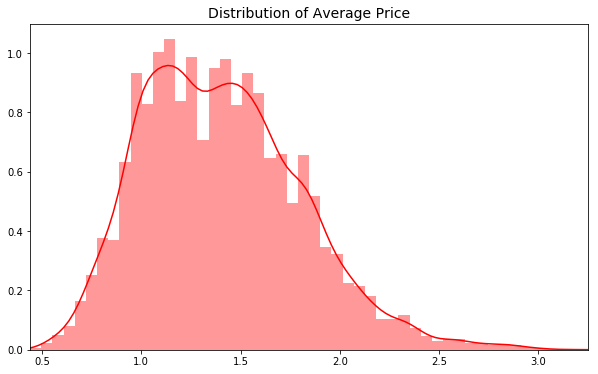

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
price_val = df['AveragePrice'].values
sns.distplot(price_val, color='r')
ax.set_title('Distribution of Average Price', fontsize=14)
ax.set_xlim([min(price_val), max(price_val)])

# 기계 학습 모델 구현

데이터 사전 준비 및 범주형 변수 인코딩

In [0]:
X = df.drop(['AveragePrice'], axis = 1).values
y = df['AveragePrice'].values

In [0]:
# Encoding categorical data(범주형 데이터 인코딩)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 8] = labelencoder_X_1.fit_transform(X[:, 9])
labelencoder_X_2 = LabelEncoder()
X[:, 9] = labelencoder_X_2.fit_transform(X[:, 10])
labelencoder_X_3 = LabelEncoder()
X[:, 10] = labelencoder_X_3.fit_transform(X[:, 10])

In [11]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(df.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
scaled_features = scaler.transform(df.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:9])
df_feat.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558


In [0]:
# Train test split, label encoding
# splitting the dataset into the Training set and Test set


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:

from sklearn import preprocessing
from sklearn import utils


lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [34]:
# 선형회귀
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = OneVsRestClassifier(logreg, n_jobs=1)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
# K-최근접 분류
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn = OneVsRestClassifier(knn, n_jobs=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [0]:
# svm
from sklearn.svm import SVC
svc = SVC()
svc = OneVsRestClassifier(svc, n_jobs=1)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [0]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree = OneVsRestClassifier(decision_tree, n_jobs=1)
decision_tree.fit(X_train, y_train)
pred_tree = decision_tree.predict(X_test)

NameError: ignored

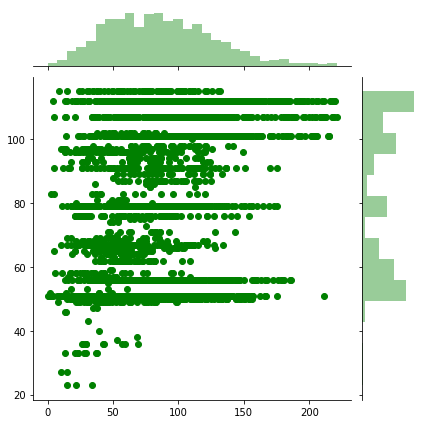

In [21]:
# 행렬

sns.jointplot(x=y_test, y=pred_logreg, color= 'g')
sns.jointplot(x=y_test, y=pred_knn, color= 'g')
sns.jointplot(x=y_test, y=pred_svc, color= 'g')
sns.jointplot(x=y_test, y=pred_tree, color= 'g')

plt.show()

Text(0, 0.5, 'Error Rate')

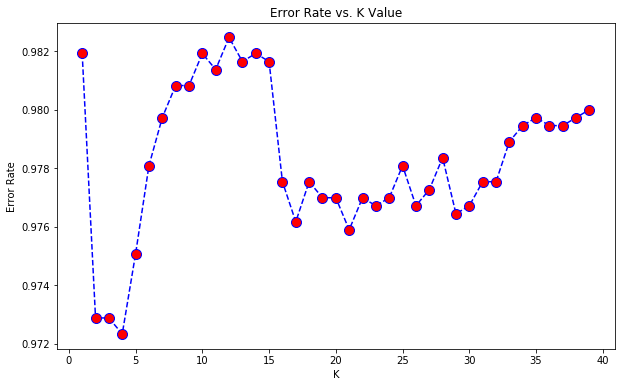

In [22]:
#
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

[]

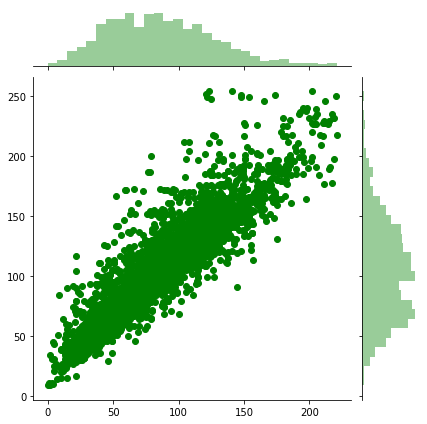

In [23]:
# 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = OneVsRestClassifier(knn, n_jobs=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
sns.jointplot(x=y_test, y=pred_knn, color= 'g')
plt.plot()

# Keras neural network will appear soon
And it is. Here i present the best model for that moment. If you have any advices, please let me know :). For now it is not working the best, as SVC model. I tried a model with a few number of units, various batch size, drop out or without and chose the best one. Maybe different number of hidden layers would help

In [24]:
print(X_train.shape[1])
print(X_train.shape[0])
print(len(np.unique(y_train)))
print((len(np.unique(y_train)) + X_train.shape[0]) /2)

11
14599
256
7427.5


In [25]:
#
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from numpy import argmax


Using TensorFlow backend.


In [0]:
#
BATCH_SIZE = 1000
EPOCHS = 30
VALIDATION_SPLIT = 0.1
file_path="weights_base3.best.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', save_best_only=True, mode='min')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5)
callbacks_list = [checkpoint, early]

In [0]:
#
def get_model():
    model = Sequential()
    model.add(Dense(7428, input_dim=X_train.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7428))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy']
                 )
    model.summary()
    return model

In [29]:
#
model_nn = get_model()
model_nn.fit(X_train, np_utils.to_categorical(y_train),
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS,
                  callbacks=callbacks_list,
                  validation_split=VALIDATION_SPLIT
             )
model_nn.load_weights(file_path)
pred_ann = argmax(model_nn.predict(X_test), axis = 1)

W0810 17:02:58.736604 140115812042624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 17:02:58.781325 140115812042624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 17:02:58.791007 140115812042624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 17:02:58.823020 140115812042624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0810 17:02:58.836135 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7428)              89136     
_________________________________________________________________
activation_1 (Activation)    (None, 7428)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7428)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 7428)              55182612  
_________________________________________________________________
activation_2 (Activation)    (None, 7428)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7428)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1901824   
Total para

KeyboardInterrupt: ignored

In [0]:
# 참고자료: 
sns.jointplot(x=y_test, y=pred_ann, color= 'g')
plt.plot()

In [36]:
!pip install KNeighborsClassifier

  ERROR: Could not find a version that satisfies the requirement KNeighborsClassifier (from versions: none)
ERROR: No matching distribution found for KNeighborsClassifier
